In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions


In [ ]:

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (569, 30)
Target shape: (569,)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Kernel Accuracy: 0.956140350877193

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



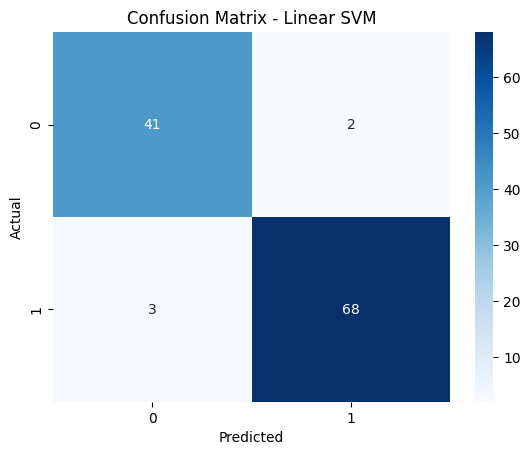

RBF Kernel Accuracy: 0.9824561403508771

Classification Report (RBF):
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



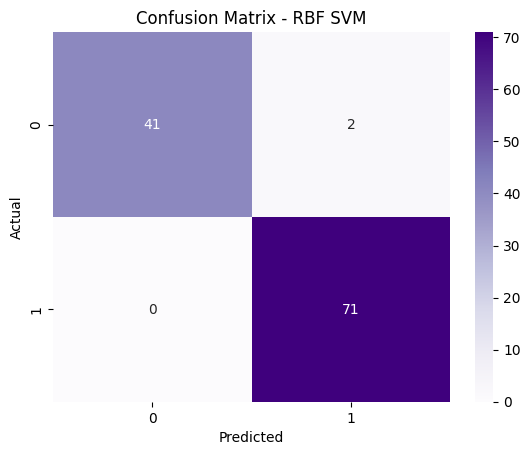

In [ ]:

linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train_scaled, y_train)
y_pred_linear = linear_svc.predict(X_test_scaled)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))

sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
rbf_svc.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svc.predict(X_test_scaled)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


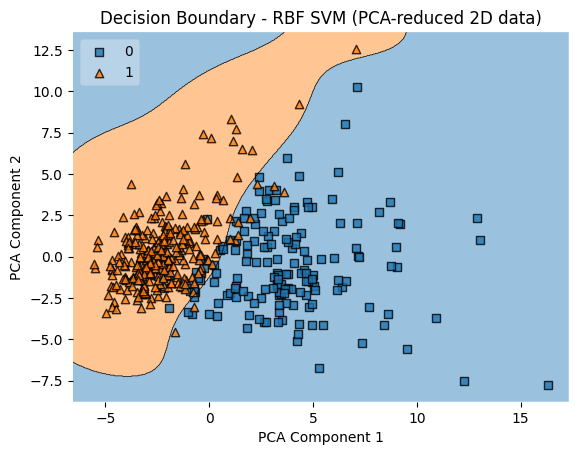

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))  


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)


svc_pca = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svc_pca.fit(X_train_pca, y_train_pca)

plot_decision_regions(X_train_pca, y_train_pca, clf=svc_pca, legend=2)
plt.title("Decision Boundary - RBF SVM (PCA-reduced 2D data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Best Parameters (RBF): {'C': 100, 'gamma': 0.001}
Best Cross-Validation Score (RBF): 0.9736263736263737

Test Accuracy with Best RBF: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



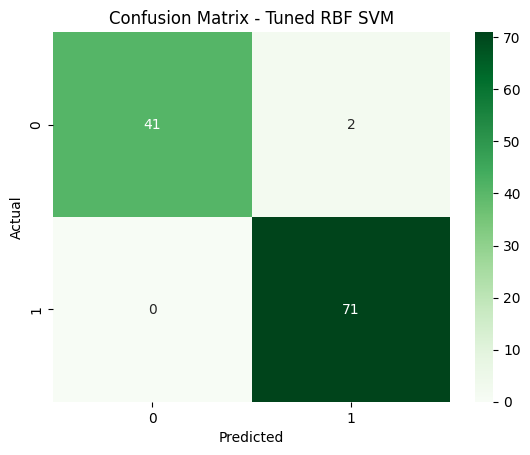

In [ ]:

rbf_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

rbf_svm = SVC(kernel='rbf', random_state=42)
grid_rbf = GridSearchCV(rbf_svm, rbf_params, cv=5)
grid_rbf.fit(X_train_scaled, y_train)

print("Best Parameters (RBF):", grid_rbf.best_params_)
print("Best Cross-Validation Score (RBF):", grid_rbf.best_score_)

best_rbf = grid_rbf.best_estimator_
y_best_rbf = best_rbf.predict(X_test_scaled)

print("\nTest Accuracy with Best RBF:", accuracy_score(y_test, y_best_rbf))
print(classification_report(y_test, y_best_rbf))

sns.heatmap(confusion_matrix(y_test, y_best_rbf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

cv_scores = cross_val_score(best_rbf, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV Accuracy: 0.9736263736263737
